# Medical Fraud Detection


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data pre-processing

In [2]:
import numpy as np 
import pandas as pd

In [3]:
dataset = pd.read_csv('MedicalFraud1.csv')

In [4]:
dataset.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,5000,5000.0,13-08-2016 14:27,98.55,Uber,US,US,2.0,1.0,rideshare,...,14-03-2015,14-03-2015,414,414,1803,PURCHASE,0.0,0,0,0
1,5000,5000.0,11-10-2016 05:05,74.51,AMC #191138,US,US,9.0,1.0,entertainment,...,14-03-2015,14-03-2015,486,486,767,PURCHASE,0.0,1,0,0
2,5000,5000.0,08-11-2016 09:18,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,14-03-2015,14-03-2015,486,486,767,PURCHASE,0.0,0,0,0
3,5000,5000.0,10-12-2016 02:14,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,14-03-2015,14-03-2015,486,486,767,PURCHASE,0.0,0,0,0
4,5000,5000.0,24-03-2016 21:04,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,06-08-2015,06-08-2015,885,885,3143,PURCHASE,0.0,1,0,0


In [5]:
dataset['transactionDateTime'] = dataset['transactionDateTime'].str.replace('-', '').str.replace(':', '').str.replace(' ', '')
dataset['currentExpDate'] = dataset['currentExpDate'].str.replace('-', '')
dataset['accountOpenDate'] = dataset['accountOpenDate'].str.replace('-', '')
dataset['dateOfLastAddressChange'] = dataset['dateOfLastAddressChange'].str.replace('-', '')
dataset.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,5000,5000.0,130820161427,98.55,Uber,US,US,2.0,1.0,rideshare,...,14032015,14032015,414,414,1803,PURCHASE,0.0,0,0,0
1,5000,5000.0,111020160505,74.51,AMC #191138,US,US,9.0,1.0,entertainment,...,14032015,14032015,486,486,767,PURCHASE,0.0,1,0,0
2,5000,5000.0,081120160918,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,14032015,14032015,486,486,767,PURCHASE,0.0,0,0,0
3,5000,5000.0,101220160214,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,14032015,14032015,486,486,767,PURCHASE,0.0,0,0,0
4,5000,5000.0,240320162104,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,06082015,06082015,885,885,3143,PURCHASE,0.0,1,0,0


In [6]:
dataset.shape

(786363, 21)

In [7]:
dataset.columns

Index(['creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'Fraud'],
      dtype='object')

In [8]:
dataset.describe()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
count,786363.000000,786363.000000,786363.000000,782309.000000,785954.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,9.049943,3.271980,544.467338,544.183857,4757.417799,4508.739089,0.448734,0.001326,0.015790
std,11636.174890,8880.783989,147.725569,16.774130,9.809023,261.524220,261.551254,2996.583810,6457.442068,0.497365,0.036395,0.124664
min,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,2.000000,1.000000,310.000000,310.000000,2178.000000,689.910000,0.000000,0.000000,0.000000
50%,7500.000000,3184.860000,87.900000,5.000000,1.000000,535.000000,535.000000,4733.000000,2451.760000,0.000000,0.000000,0.000000
75%,15000.000000,7500.000000,191.480000,9.000000,1.000000,785.000000,785.000000,7338.000000,5291.095000,1.000000,0.000000,0.000000
max,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,47498.810000,1.000000,1.000000,1.000000


In [9]:
dataset.info

<bound method DataFrame.info of         creditLimit  availableMoney transactionDateTime  transactionAmount  \
0              5000         5000.00        130820161427              98.55   
1              5000         5000.00        111020160505              74.51   
2              5000         5000.00        081120160918               7.47   
3              5000         5000.00        101220160214               7.47   
4              5000         5000.00        240320162104              71.18   
...             ...             ...                 ...                ...   
786358        50000        48904.96        221220161844             119.92   
786359        50000        48785.04        251220161620              18.89   
786360        50000        48766.15        271220161546              49.43   
786361        50000        48716.72        291220160030              49.89   
786362        50000        48666.83        301220162010              72.18   

               merchantName acq

In [10]:
dataset.dtypes

creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
currentBalance              float64
cardPresent                   int64
expirationDateKeyInMatch      int64
Fraud                         int64
dtype: object

In [11]:
dataset.isnull()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
786359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
786360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
786361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
missing_values = dataset.isnull().sum()
missing_values

creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
Fraud                          0
dtype: int64

In [13]:
missing_percentage = (missing_values / len(dataset)) * 100
print(missing_percentage)


creditLimit                 0.000000
availableMoney              0.000000
transactionDateTime         0.000000
transactionAmount           0.000000
merchantName                0.000000
acqCountry                  0.580139
merchantCountryCode         0.092069
posEntryMode                0.515538
posConditionCode            0.052012
merchantCategoryCode        0.000000
currentExpDate              0.000000
accountOpenDate             0.000000
dateOfLastAddressChange     0.000000
cardCVV                     0.000000
enteredCVV                  0.000000
cardLast4Digits             0.000000
transactionType             0.088763
currentBalance              0.000000
cardPresent                 0.000000
expirationDateKeyInMatch    0.000000
Fraud                       0.000000
dtype: float64


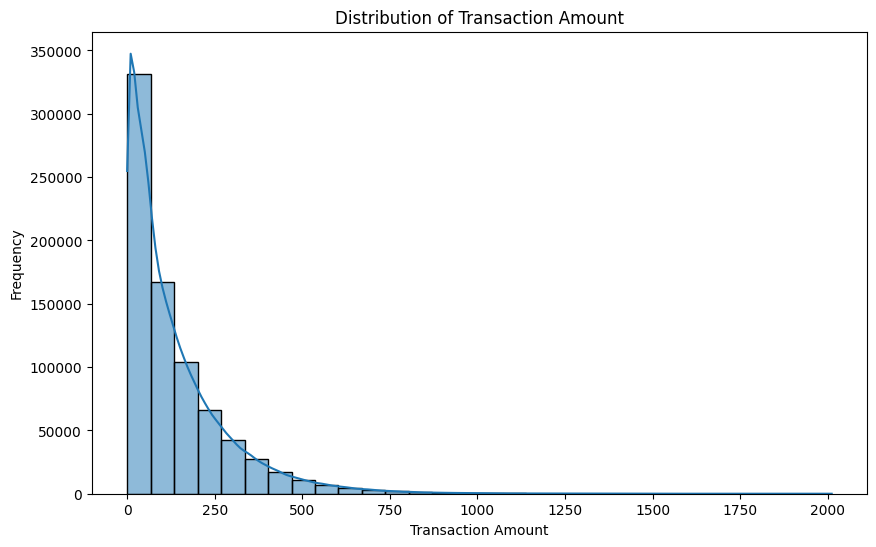

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['transactionAmount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


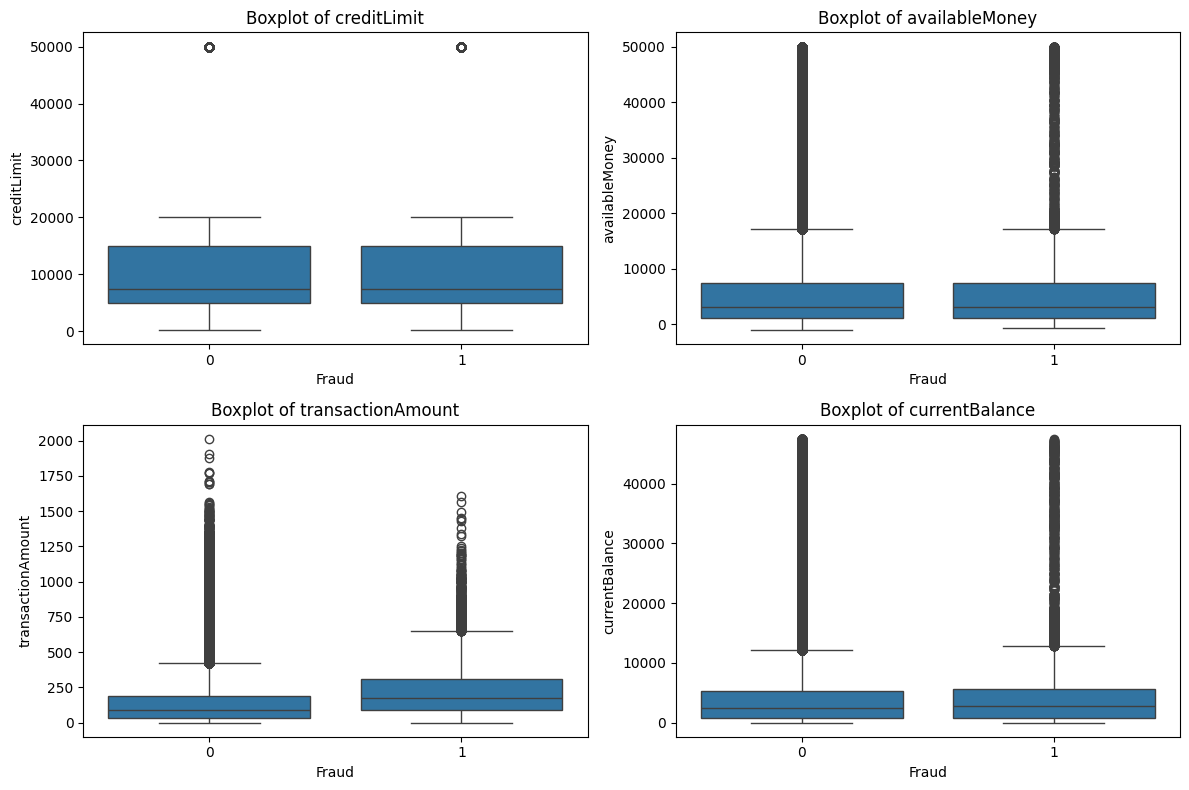

In [15]:

# Select numerical columns for boxplot
numerical_columns = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Fraud', y=column, data=dataset)
    plt.title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


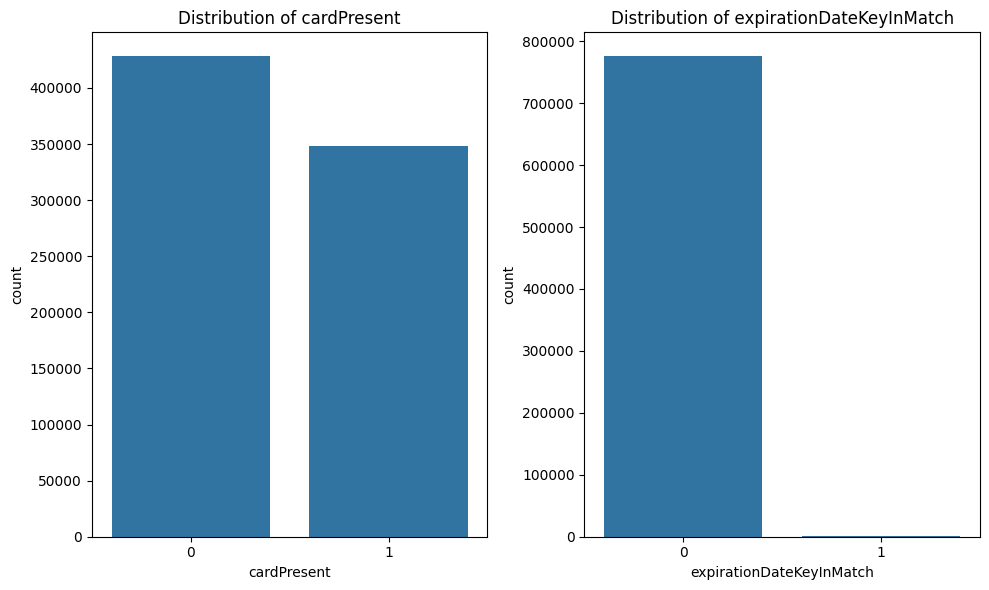

In [22]:
plt.figure(figsize=(10, 6))

# Create bar plots for binary features
plt.subplot(1, 2, 1)
sns.countplot(x='cardPresent', data=dataset)
plt.title('Distribution of cardPresent')

plt.subplot(1, 2, 2)
sns.countplot(x='expirationDateKeyInMatch', data=dataset)
plt.title('Distribution of expirationDateKeyInMatch')

# Adjust layout
plt.tight_layout()
plt.show()

### Handle Missing Values

In [17]:
 dataset.dropna(inplace=True)

In [18]:
dataset

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,5000,5000.00,130820161427,98.55,Uber,US,US,2.0,1.0,rideshare,...,14032015,14032015,414,414,1803,PURCHASE,0.00,0,0,0
1,5000,5000.00,111020160505,74.51,AMC #191138,US,US,9.0,1.0,entertainment,...,14032015,14032015,486,486,767,PURCHASE,0.00,1,0,0
2,5000,5000.00,081120160918,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,14032015,14032015,486,486,767,PURCHASE,0.00,0,0,0
3,5000,5000.00,101220160214,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,14032015,14032015,486,486,767,PURCHASE,0.00,0,0,0
4,5000,5000.00,240320162104,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,06082015,06082015,885,885,3143,PURCHASE,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,221220161844,119.92,Lyft,US,US,90.0,1.0,rideshare,...,23082012,23082012,936,936,3783,PURCHASE,1095.04,0,0,0
786359,50000,48785.04,251220161620,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,...,23082012,23082012,939,939,3388,PURCHASE,1214.96,0,0,0
786360,50000,48766.15,271220161546,49.43,Lyft,US,US,2.0,1.0,rideshare,...,23082012,23082012,936,936,3783,PURCHASE,1233.85,0,0,0
786361,50000,48716.72,291220160030,49.89,walmart.com,US,US,9.0,99.0,online_retail,...,23082012,23082012,939,939,3388,PURCHASE,1283.28,0,0,0


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_columns = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
dataset[numerical_columns] = min_max_scaler.fit_transform(dataset[numerical_columns])

# Z-score Normalization
standard_scaler = StandardScaler()
dataset[numerical_columns] = standard_scaler.fit_transform(dataset[numerical_columns])


In [20]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable
X_train, X_test, y_train, y_test = train_test_split(dataset[numerical_columns], dataset['Fraud'], test_size=0.2, random_state=42)

# Apply normalization separately to training and testing sets
X_train_normalized = standard_scaler.fit_transform(X_train)
X_test_normalized = standard_scaler.transform(X_test)


In [21]:
X_train_normalized

array([[-0.27996247,  0.13514836, -0.554668  , -0.68895076],
       [-0.83918136, -0.68497398,  1.13222874, -0.56922189],
       [ 0.79545848,  0.27120364, -0.02094105,  1.05839883],
       ...,
       [ 0.79545848,  0.80067933,  5.20407182,  0.33180973],
       [-0.49504665, -0.53523537,  1.38836081, -0.15580745],
       [-0.83918136, -0.65549891, -0.92732221, -0.60966996]])

In [24]:
X_test_normalized

array([[-0.27996247, -0.21775764,  0.1981558 , -0.20466479],
       [-0.06487828,  0.21968145, -0.56665198, -0.41814275],
       [-0.27996247, -0.17762883,  0.00905274, -0.25973277],
       ...,
       [-0.71013084, -0.51985742,  0.18691659, -0.56372144],
       [-0.49504665, -0.62432469,  1.84700173, -0.03355193],
       [-0.49504665, -0.33008696, -0.04842971, -0.43732858]])

#### Handle Categorical Variables

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['acqCountry'] = le.fit_transform(dataset['acqCountry'])
dataset['merchantName'] = le.fit_transform(dataset['merchantName'])
dataset['merchantCountryCode'] = le.fit_transform(dataset['merchantCountryCode'])
dataset['merchantCategoryCode'] = le.fit_transform(dataset['merchantCategoryCode'])
dataset['currentExpDate'] = le.fit_transform(dataset['currentExpDate'])
dataset['accountOpenDate'] = le.fit_transform(dataset['accountOpenDate'])
dataset['dateOfLastAddressChange'] = le.fit_transform(dataset['dateOfLastAddressChange'])
dataset['transactionType'] = le.fit_transform(dataset['transactionType'])


In [26]:
dataset

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,-0.494890,-0.140594,130820161427,-0.260166,2085,3,3,2.0,1.0,17,...,794,952,414,414,1803,1,-0.698223,0,0,0
1,-0.494890,-0.140594,111020160505,-0.422932,27,3,3,9.0,1.0,3,...,794,952,486,486,767,1,-0.698223,1,0,0
2,-0.494890,-0.140594,081120160918,-0.876834,1304,3,3,9.0,1.0,12,...,794,952,486,486,767,1,-0.698223,0,0,0
3,-0.494890,-0.140594,101220160214,-0.876834,1304,3,3,9.0,1.0,12,...,794,952,486,486,767,1,-0.698223,0,0,0
4,-0.494890,-0.140594,240320162104,-0.445478,2083,3,3,2.0,1.0,4,...,338,406,885,885,3143,1,-0.698223,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,3.374003,4.807175,221220161844,-0.115478,1060,3,3,90.0,1.0,17,...,1355,1625,936,936,3783,1,-0.528640,0,0,0
786359,3.374003,4.793661,251220161620,-0.799513,2478,3,3,9.0,1.0,15,...,1355,1625,939,939,3388,1,-0.510069,0,0,0
786360,3.374003,4.791533,271220161546,-0.592739,1060,3,3,2.0,1.0,17,...,1355,1625,936,936,3783,1,-0.507143,0,0,0
786361,3.374003,4.785962,291220160030,-0.589624,2486,3,3,9.0,99.0,14,...,1355,1625,939,939,3388,1,-0.499489,0,0,0


In [27]:
X = dataset.drop(["Fraud","merchantCountryCode"], axis=1)
y = dataset["Fraud"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch
732393,-0.279952,0.134936,121020161854,-0.554756,341,3,5.0,1.0,6,119,1583,1898,766,766,2801,1,-0.689700,0,0
540047,-0.838792,-0.684771,040520161327,1.132142,2471,3,9.0,8.0,14,25,1689,2027,741,741,7308,1,-0.569862,0,0
479943,0.794741,0.270922,090320160441,-0.021028,2134,3,5.0,1.0,5,39,1304,1014,549,549,654,1,1.059235,1,0
280071,-0.279952,-0.317277,111020160952,0.491778,1288,3,2.0,1.0,10,48,314,1534,414,414,52,1,-0.068260,1,0
74297,0.794741,0.375455,210320160222,-0.267614,2475,3,80.0,1.0,14,77,1177,1413,132,132,4100,1,0.915584,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262390,-0.494890,-0.362944,030920161737,-0.675679,1129,3,9.0,8.0,13,60,1230,46,869,869,593,1,-0.392664,0,0
370458,-0.494890,-0.371388,260420160439,-0.853407,2481,3,5.0,8.0,14,91,1777,2133,920,920,1293,1,-0.381060,0,0
133601,0.794741,0.800129,271020162211,5.203989,2477,3,2.0,1.0,14,105,428,1991,482,482,2334,1,0.331987,0,0
679483,-0.494890,-0.535108,160820160533,1.388275,187,3,5.0,8.0,4,118,1380,892,738,738,7185,1,-0.156073,1,0


In [29]:
X_test

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch
758383,-0.279952,-0.217791,250720161035,0.198069,593,3,5.0,1.0,5,47,525,630,810,810,5737,1,-0.204974,1,0
498390,-0.065013,0.219426,240420162255,-0.566740,214,3,5.0,1.0,4,3,1085,1304,868,868,4927,1,-0.418646,1,0
230562,-0.279952,-0.177683,270120160148,0.008966,32,3,2.0,1.0,3,1,1263,654,157,157,2499,1,-0.260092,1,0
427348,-0.494890,-0.667134,130220160538,-0.330987,2484,3,5.0,1.0,14,54,11,1368,917,917,2178,1,0.025361,0,0
415865,-0.494890,-0.458128,080520161755,-0.384272,2085,3,2.0,1.0,17,51,561,591,945,945,9284,1,-0.261861,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171172,-0.065013,0.268194,271020160140,0.040720,1202,3,5.0,1.0,18,80,1333,1598,246,246,1066,1,-0.485664,0,0
711107,-0.709829,-0.616548,011020161920,-0.076886,34,3,2.0,1.0,3,127,1620,1679,891,891,5742,1,-0.431319,1,0
306912,-0.709829,-0.519738,090220160136,0.186830,1060,3,9.0,1.0,17,22,877,369,931,931,4396,1,-0.564357,0,0
266595,-0.494890,-0.624152,211020160713,1.846916,1196,3,2.0,1.0,13,105,1230,1057,869,869,593,1,-0.033706,0,0


In [30]:
y_train

732393    0
540047    0
479943    0
280071    0
74297     0
         ..
262390    0
370458    0
133601    0
679483    0
123499    0
Name: Fraud, Length: 621334, dtype: int64

In [31]:
y_test

758383    0
498390    0
230562    0
427348    0
415865    0
         ..
171172    0
711107    0
306912    0
266595    0
227301    0
Name: Fraud, Length: 155334, dtype: int64

#### Model selection

- Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [35]:
accuracy

0.9843047883914662

In [36]:
confusion

array([[152896,      0],
       [  2438,      0]], dtype=int64)

In [37]:
classification_report_str

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99    152896\n           1       0.00      0.00      0.00      2438\n\n    accuracy                           0.98    155334\n   macro avg       0.49      0.50      0.50    155334\nweighted avg       0.97      0.98      0.98    155334\n'

- Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

In [40]:
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
confusion_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
accuracy_naive_bayes



0.9843047883914662

In [41]:
confusion_naive_bayes

array([[152896,      0],
       [  2438,      0]], dtype=int64)

- k-nearest neighbour

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix



# Assuming 'dataset' is your DataFrame and 'target_column' is the column you want to predict
# Select features and target variable
features = dataset[['transactionAmount', 'creditLimit', 'currentBalance']]
target = dataset['Fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the value of k (number of neighbors)
k_value = 3

# Create the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9833455650404934


In [45]:
# Additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    152896
           1       0.03      0.03      0.03      2438

    accuracy                           0.97    155334
   macro avg       0.51      0.51      0.51    155334
weighted avg       0.97      0.97      0.97    155334



- Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", str(accuracy))

# Additional metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.9693499169531461
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    152896
           1       0.03      0.03      0.03      2438

    accuracy                           0.97    155334
   macro avg       0.51      0.51      0.51    155334
weighted avg       0.97      0.97      0.97    155334



- Random Forest Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=20)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [45]:
y_pred_forest = random_forest_model.predict(X_test)

In [46]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
confusion_forest = confusion_matrix(y_test, y_pred_forest)

In [47]:
accuracy_forest

0.9836996407740739

In [48]:
confusion_forest

array([[152798,     98],
       [  2434,      4]], dtype=int64)

### deployment

In [49]:
pip install flask scikit-learn pandas joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.linear_model import LogisticRegression
import pickle

# Assuming 'features' and 'target' are your training data
# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(features, target)

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model, file)


In [65]:
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [66]:
loaded_model

LogisticRegression(random_state=42)